# Curso: Bioestatística — Experimento Fatorial DBC (Delineamento em Bloco Casualizado)
## Autores: Sandro da Silva Camargo e Fernando Cardoso

**Problema**: Um pesquisador objetiva avaliar as medidas biométricas das carcaças e o tamanho dos órgãos internos de bovinos alimentados com diferentes fontes protéicas e volumosos na fase de terminação.

Para tal, foi elaborado um experimento com dois fatores qualitativos, em
delineamento DBC com quatro repetições (blocos). A variável medida
foi o perı́metro da garupa (cm).

Tipos de Volumosos:
* V1: Brachiaria brizantha
* V2: Cana de açúcar picada
* V3: Silagem de milho

Fontes Protéicas:
* P1: Ureia
* P2: Farelo de soja

Estrutura experimental:
Para estudar simultaneamente os efeitos desses dois fatores e sua possível interação, o pesquisador planejou um experimento fatorial 3×2, resultando em seis combinações de tratamentos:

|Tratamento|Volumoso|Fonte Protéica|
|:--|:--:|:--:|
|V1P1	|Brachiaria brizantha	|Ureia|
|V2P1	|Cana de açúcar picada	|Ureia|
|V3P1	|Silagem de milho	|Ureia|
|V1P2	|Brachiaria brizantha	|Farelo de soja|
|V2P2 |Cana de açúcar picada |Farelo de soja|
|V2P3 |Silagem de milho|Farelo de soja|

Cada tratamento será aplicado a quatro unidades experimentais, permitindo comparar as médias de produção entre os grupos.

Objetivo:
*  Verificar os efeitos principais de Volumoso e Fonte Protéica;
*  Verificar a interação entre os fatores, isto é, se o efeito de um fator depende da presença do outro.

A base de dados está disponível [aqui](https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/fatorial-dbc-dados.txt).

Abra este código no seu google colab [clicando aqui](https://colab.research.google.com/github/Sandrocamargo/biostatistics/blob/master/python/bioe_05_fatorial_dbc.ipynb).

# Carga de bibliotecas

In [1]:
!pip install pingouin
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import pingouin as pg

# Carga dos dados e definição dos nomes das colunas

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/fatorial-dbc-dados.txt", sep="\t", header=0)

# Converte para fatores (categorias)
for col in ["TR", "VAR", "PROT", "BL"]:
    dados[col] = dados[col].astype("category")

# Renomeia para manter compatibilidade com R
dados.rename(columns={"PROT": "PR"}, inplace=True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   TR      24 non-null     category
 1   VAR     24 non-null     category
 2   PR      24 non-null     category
 3   BL      24 non-null     category
 4   PG      24 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.1 KB


# GRÁFICOS INICIAIS (OUTLIERS)

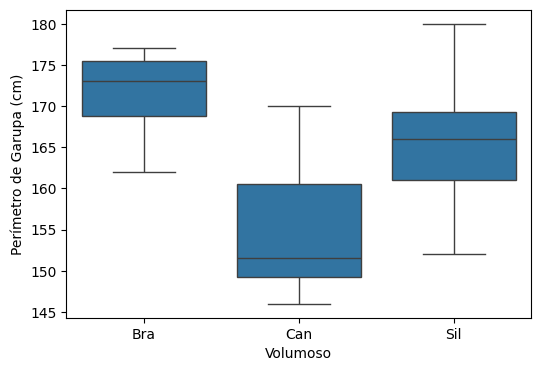

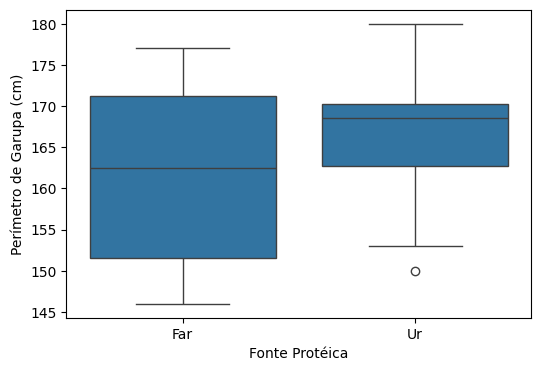

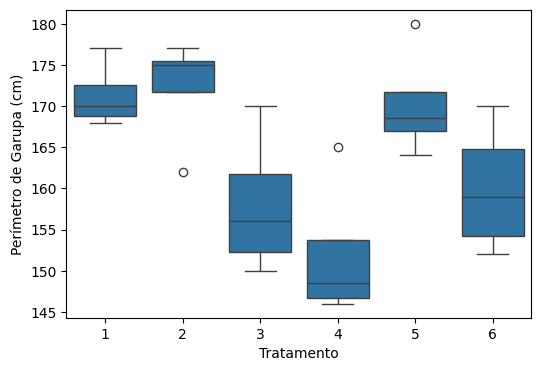

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="VAR", y="PG", data=dados)
plt.xlabel("Volumoso"); plt.ylabel("Perímetro de Garupa (cm)")
plt.savefig("fat1-boxplot-volumoso.pdf")

plt.figure(figsize=(6, 4))
sns.boxplot(x="PR", y="PG", data=dados)
plt.xlabel("Fonte Protéica"); plt.ylabel("Perímetro de Garupa (cm)")
plt.savefig("fat1-boxplot-fonte.pdf")

plt.figure(figsize=(6, 4))
sns.boxplot(x="TR", y="PG", data=dados)
plt.xlabel("Tratamento"); plt.ylabel("Perímetro de Garupa (cm)")
plt.savefig("fat1-boxplot-tratamento.pdf")

# GRÁFICOS DE INTERAÇÃO

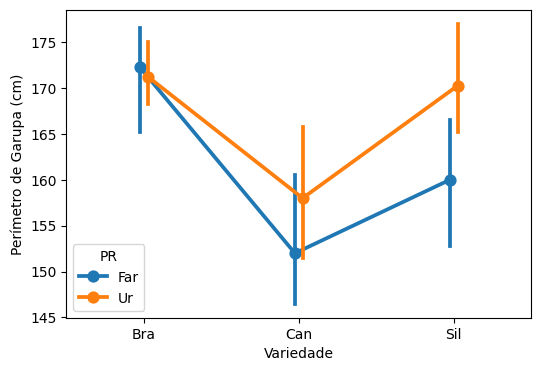

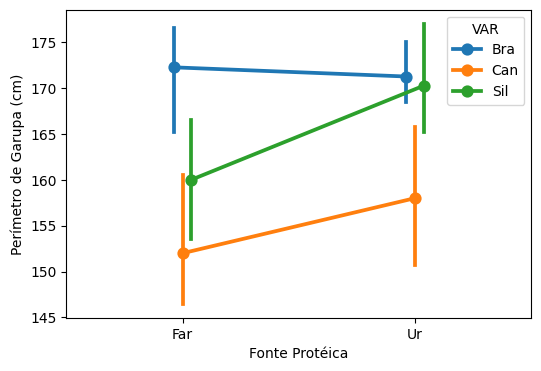

In [4]:
plt.figure(figsize=(6, 4))
sns.pointplot(x="VAR", y="PG", hue="PR", data=dados, dodge=True, markers="o")
plt.xlabel("Variedade"); plt.ylabel("Perímetro de Garupa (cm)")
plt.savefig("fat1-iter-variedade.pdf")

plt.figure(figsize=(6, 4))
sns.pointplot(x="PR", y="PG", hue="VAR", data=dados, dodge=True, markers="o")
plt.xlabel("Fonte Protéica"); plt.ylabel("Perímetro de Garupa (cm)")
plt.savefig("fat1-iter-fonte.pdf")

# ANÁLISE DE VARIÂNCIA

In [5]:
modelo = ols("PG ~ C(VAR) + C(PR) + C(VAR):C(PR) + C(BL)", data=dados).fit()
print(modelo.summary())
anova = anova_lm(modelo, typ=2)
print("\n=== ANOVA ===")
print(anova)

                            OLS Regression Results                            
Dep. Variable:                     PG   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     7.399
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           0.000488
Time:                        23:59:22   Log-Likelihood:                -70.237
No. Observations:                  24   AIC:                             158.5
Df Residuals:                      15   BIC:                             169.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**🧠 Qualidade geral do modelo**

*  R² = 0.798 → o modelo explica cerca de 79,8% da variação total no perímetro de garupa.
*  R² ajustado = 0.690 → considerando o número de fatores, o ajuste ainda é bom, indicando que o modelo é adequado.
*  F(8,15) = 7.399; p = 0.000488 → o modelo geral é altamente significativo, ou seja, pelo menos um fator (ou interação) influencia o perímetro de garupa.


**🧩 ANOVA dos efeitos**

|Fonte de variação|	gl|	F|	p-valor|	Interpretação|
|:--|:--:|:--:|:--:|:--|
|C(VAR)|	2	|17.45	|0.0001|	Altamente significativo → o tipo de volumoso afeta o perímetro de garupa.|
|C(PR)|	1|	4.75	|0.0456|	Significativo → a fonte proteica também influencia o resultado.|
|C(BL)	|3	|5.20|	0.0116|	Significativo → há variação entre blocos (diferenças de condições ou animais).|
|C(VAR):C(PR)|	2|	1.98|	0.173|	Não significativo → não há interação relevante entre volumoso e fonte proteica.|

**➡️ Conclusão da ANOVA**

*  A interação entre volumoso e fonte proteica não é significativa, o que indica que os efeitos desses fatores são aditivos (podem ser interpretados separadamente).

**⚙️ Coeficientes do modelo**
|Termo|	Coef.|	p-valor|	Interpretação|
|:--|:--|:--|:--|
|Intercepto (179.96)|	—|	—|	Média do grupo de referência (Variedade = Bra, Proteína = Far, Bloco 1).|
|C(VAR)[T.Can]| = -20.25|	0.000|	O volumoso “Can” reduz o PG em ~20 cm em relação a “Bra”.	|
|C(VAR)[T.Sil]| = -12.25|	0.008|	O volumoso “Sil” reduz o PG em ~12 cm em relação a “Bra”.	|
|C(PR)[T.Ur]| = -1.00|0.808|	Fonte proteica “Ur” não difere significativamente da “Far”.	|
|C(BL)[T.2–4]||	p < 0.05|	Há diferenças entre blocos → efeito de variabilidade experimental.	|
|Interações (VAR×PR)||	p > 0.05|	Nenhuma interação significativa, confirmando o resultado da ANOVA.|


**📊 Diagnósticos do modelo**
*  Teste de normalidade (Omnibus, JB): p > 0.4 → resíduos seguem distribuição normal.
*  Condição (Cond. No. = 10.3) → sem multicolinearidade preocupante.
*  Durbin-Watson = 1.69 → resíduos sem autocorrelação relevante.
*  ➡️ As pressuposições da ANOVA parecem atendidas.


**📈 Interpretação prática**
*  O tipo de volumoso tem forte influência sobre o perímetro de garupa — “Bra” (Braquiária) apresentou os maiores valores.
*  A fonte proteica teve efeito menor, mas significativo (possivelmente apenas uma das fontes promove ganho marginal).
*  Blocos mostraram variação sistemática, justificando o uso do delineamento em blocos.
*  Sem interação VAR×PR, portanto as comparações de médias podem ser feitas separadamente por fator.

# DIAGNÓSTICO DE PRESSUPOSIÇÕES


Shapiro-Wilk Test:
ShapiroResult(statistic=np.float64(0.9408088275521843), pvalue=np.float64(0.17003548256970064))

Levene Test:
LeveneResult(statistic=np.float64(0.41090755593076356), pvalue=np.float64(0.83495621575186))

Durbin-Watson: 1.691


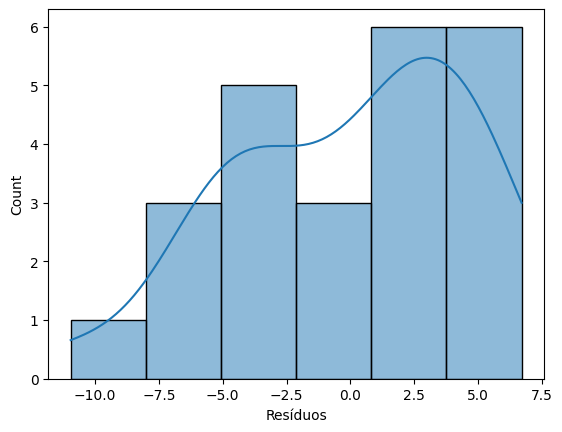

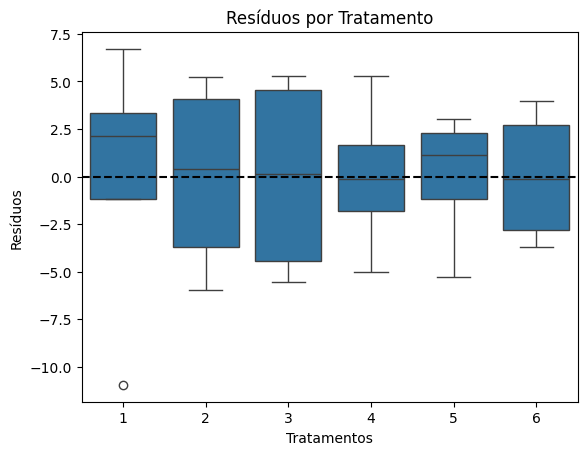

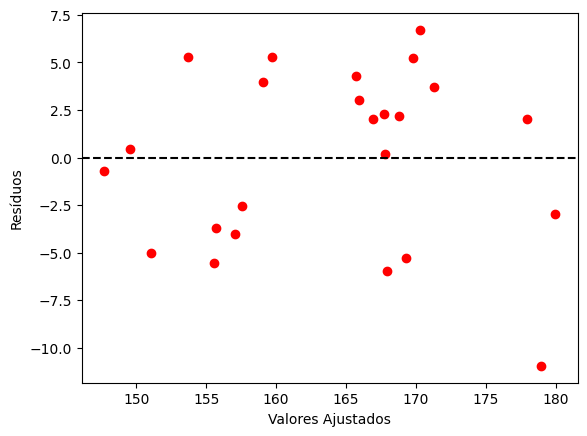

In [10]:
residuo = modelo.resid
ajustado = modelo.fittedvalues

# Normalidade dos resíduos
print("\nShapiro-Wilk Test:")
print(stats.shapiro(residuo))

plt.figure()
sns.histplot(residuo, kde=True)
plt.xlabel("Resíduos")
plt.savefig("fat1-hist-residuos.pdf")

# Homocedasticidade (teste de Levene)
print("\nLevene Test:")
print(stats.levene(*[residuo[dados["TR"] == tr] for tr in dados["TR"].unique()]))

plt.figure()
sns.boxplot(x="TR", y=residuo, data=dados)
plt.xlabel("Tratamentos")
plt.ylabel("Resíduos")
plt.title("Resíduos por Tratamento")
plt.axhline(0, color='black', linestyle='--')
plt.savefig("fat1-residuos-por-tratamento.pdf")

# Independência (Durbin-Watson)
dw = sm.stats.durbin_watson(residuo)
print(f"\nDurbin-Watson: {dw:.3f}")

# Gráficos diagnósticos
plt.figure()
plt.scatter(ajustado, residuo, color='red')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.axhline(0, color='black', linestyle='--')
plt.savefig("fat1-residuos-ajustados.pdf")

# TESTES DE TUKEY (comparações múltiplas)



Tukey HSD para Variedade:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Bra    Can   -16.75 0.0009 -26.5984 -6.9016   True
   Bra    Sil   -6.625 0.2303 -16.4734  3.2234  False
   Can    Sil   10.125 0.0432   0.2766 19.9734   True
-----------------------------------------------------

Tukey HSD para Fonte Protéica:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Far     Ur   5.0833 0.2328 -3.5091 13.6758  False
----------------------------------------------------

Tukey HSD para Tratamento:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      1.0    1.0 -15.7351 17.7351  False
     1      3   -13.25  0.171 -29.9851  3.4851  False


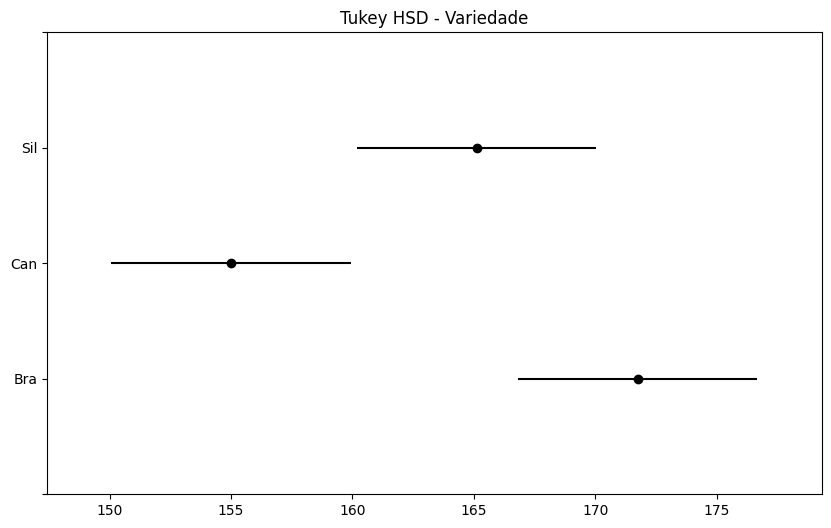

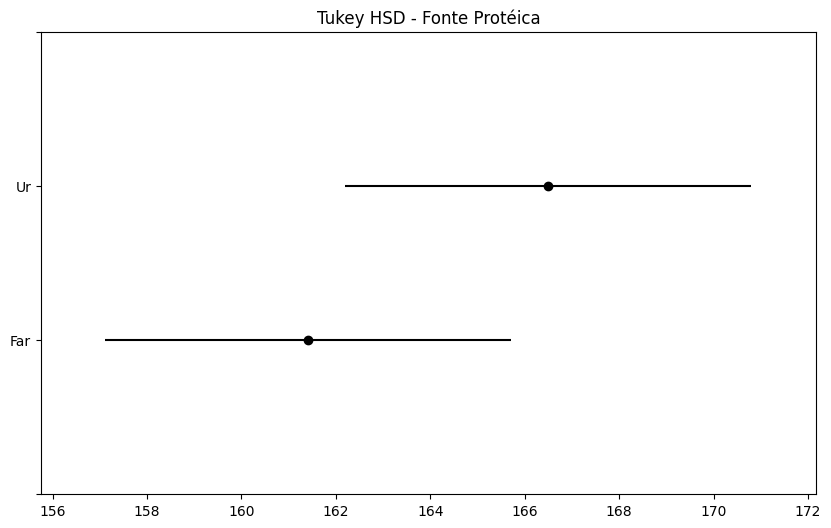

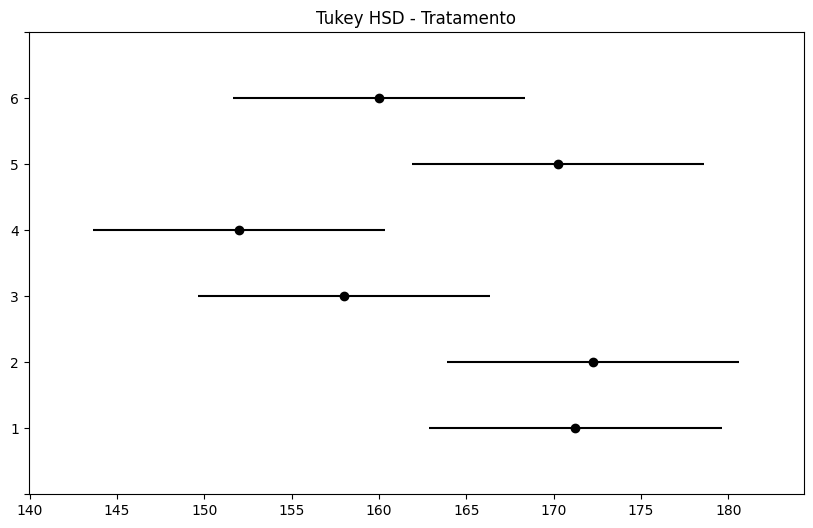

In [12]:
print("\nTukey HSD para Variedade:")
tukey_var = pairwise_tukeyhsd(dados["PG"], dados["VAR"])
print(tukey_var)

print("\nTukey HSD para Fonte Protéica:")
tukey_pr = pairwise_tukeyhsd(dados["PG"], dados["PR"])
print(tukey_pr)

print("\nTukey HSD para Tratamento:")
tukey_tr = pairwise_tukeyhsd(dados["PG"], dados["TR"])
print(tukey_tr)

# Gráficos de Tukey
tukey_var.plot_simultaneous()
plt.title("Tukey HSD - Variedade")
plt.savefig("fat1-tukey-variedade.pdf")

tukey_pr.plot_simultaneous()
plt.title("Tukey HSD - Fonte Protéica")
plt.savefig("fat1-tukey-fonte.pdf")

tukey_tr.plot_simultaneous()
plt.title("Tukey HSD - Tratamento")
plt.savefig("fat1-tukey-tratamento.pdf")

In [14]:
# ----------------------------------------------------------
# MÉDIAS AGRUPADAS (equivalente ao emmeans + cld)
# ----------------------------------------------------------
print("\nMédias e Grupos de Variedade:")
pg.pairwise_tukey(dv="PG", between="VAR", data=dados)

print("\nMédias e Grupos de Fonte Protéica:")
pg.pairwise_tukey(dv="PG", between="PR", data=dados)

print("\nMédias e Grupos de Tratamento:")
pg.pairwise_tukey(dv="PG", between="TR", data=dados)


Médias e Grupos de Variedade:

Médias e Grupos de Fonte Protéica:

Médias e Grupos de Tratamento:


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,171.25,172.25,-1.00,5.265849,-0.189903,0.999959,-0.153919
1,1,3,171.25,158.00,13.25,5.265849,2.516213,0.171013,1.678388
2,1,4,171.25,152.00,19.25,5.265849,3.655631,0.018964,2.438413
3,1,5,171.25,170.25,1.00,5.265849,0.189903,0.999959,0.154730
4,1,6,171.25,160.00,11.25,5.265849,2.136408,0.313257,1.525463
5,2,3,172.25,158.00,14.25,5.265849,2.706116,0.122449,1.563745
6,2,4,172.25,152.00,20.25,5.265849,3.845534,0.012765,2.222164
7,2,5,172.25,170.25,2.00,5.265849,0.379806,0.998785,0.253006
8,2,6,172.25,160.00,12.25,5.265849,2.326310,0.234161,1.413500
9,3,4,158.00,152.00,6.00,5.265849,1.139417,0.858560,0.590753
